# Amazon Prime Data Analysis
#### By Connie Chung



In [87]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [64]:
# Inputting the data into a dataframe 'df'
df = pd.read_csv("/Users/conniechung/Downloads/amazon_prime_titles.csv")

# Cleaning up the data

In [66]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [67]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [65]:
df.info()
# We are missing some data in the directory, cast, country, date_added, and rating columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [69]:
df.isna().sum()
# Data has some null values

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [70]:
df['director'].fillna("NA", inplace=True)
df['cast'].fillna("NA", inplace=True)
df['country'].fillna("NA", inplace=True)
df['date_added'].fillna("NA", inplace=True)
df['rating'].fillna("NA", inplace=True)

# How to handle the null values...?
# I decided to fill the null values with "NA" to keep my data consistent

In [68]:
df.duplicated().sum()
# No duplicated data

0

In [80]:
df['rating'].unique()
# There are some values that mean the same thing. For example, 'UNRATED' and 'NR'. Let's go fix that next.

array(['NA', '13+', 'ALL_AGES', '18+', 'R', 'TV-Y', 'TV-Y7', 'UNRATED',
       '16+', 'TV-PG', '7+', 'TV-14', 'TV-NR', 'TV-G', 'PG-13', 'TV-MA',
       'G', 'PG', 'NC-17'], dtype=object)

In [72]:
count_of_ratings = df['rating'].value_counts()
count_of_ratings

rating
13+         2117
16+         1547
ALL         1268
18+         1243
R           1010
PG-13        393
7+           385
NA           337
PG           253
NR           223
TV-14        208
TV-PG        169
TV-NR        105
G             93
TV-G          81
TV-MA         77
TV-Y          74
TV-Y7         39
UNRATED       33
NC-17          3
AGES_18_       3
NOT_RATE       3
AGES_16_       2
16             1
ALL_AGES       1
Name: count, dtype: int64

In [111]:
# Some values mean the same thing. I will fix the similar values 
# by using a dictionary and replacing them back into the dataframe
fix_rating = {
    "ALL": "ALL_AGES",
    "NR": "UNRATED",
    "NOT_RATE": "UNRATED",
    "AGES_16_": "16+",
    "16": "16+",
    "AGES_18_": "18+"
}

df['rating'] = df['rating'].replace(fix_rating)

count_of_rating = df['rating'].value_counts()
print(count_of_rating)

rating
13+         2117
16+         1550
ALL_AGES    1269
18+         1246
R           1010
PG-13        393
7+           385
NA           337
UNRATED      259
PG           253
TV-14        208
TV-PG        169
TV-NR        105
G             93
TV-G          81
TV-MA         77
TV-Y          74
TV-Y7         39
NC-17          3
Name: count, dtype: int64


In [74]:
df.info()
# Nice! Now we can see that there are no more null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      9668 non-null   object
 4   cast          9668 non-null   object
 5   country       9668 non-null   object
 6   date_added    9668 non-null   object
 7   release_year  9668 non-null   int64 
 8   rating        9668 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [75]:
df.head()
# Deciding to drop some columns that will be unnessary for the data analysis.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NA,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NA,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NA,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NA,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [76]:
df = df.drop(['cast', 'description'], axis=1)
# Dropping the cast and description columns

In [77]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,The Grand Seduction,Don McKellar,Canada,"March 30, 2021",2014,NA,113 min,"Comedy, Drama"
1,s2,Movie,Take Care Good Night,Girish Joshi,India,"March 30, 2021",2018,13+,110 min,"Drama, International"
2,s3,Movie,Secrets of Deception,Josh Webber,United States,"March 30, 2021",2017,NA,74 min,"Action, Drama, Suspense"
3,s4,Movie,Pink: Staying True,Sonia Anderson,United States,"March 30, 2021",2014,NA,69 min,Documentary
4,s5,Movie,Monster Maker,Giles Foster,United Kingdom,"March 30, 2021",1989,NA,45 min,"Drama, Fantasy"


# Exploratory Data Analysis
Let's go see what insights the data is holding
1. How many movies and tv shows are there? Does Amazon Prime release more movies or TV shows?
2. What are the most common ratings of movies and tv shows?
3. What years released the most and least amount of movies and shows?

In [82]:
df.describe()

,release_year
count,9668.000000
mean,2008.341849
std,18.922482
min,1920.000000
25%,2007.000000
50%,2016.000000
75%,2019.000000
max,2021.000000


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      9668 non-null   object
 4   country       9668 non-null   object
 5   date_added    9668 non-null   object
 6   release_year  9668 non-null   int64 
 7   rating        9668 non-null   object
 8   duration      9668 non-null   object
 9   listed_in     9668 non-null   object
dtypes: int64(1), object(9)
memory usage: 755.4+ KB


### 1. How many movies and tv shows are there?

In [107]:
count_type = df.type.value_counts()
count_type

type
Movie      7814
TV Show    1854
Name: count, dtype: int64

In [108]:
total_count = df.type.value_counts().sum()
total_count

9668

In [110]:
percentage = count_type/total_count * 100
percentage

type
Movie      80.823335
TV Show    19.176665
Name: count, dtype: float64

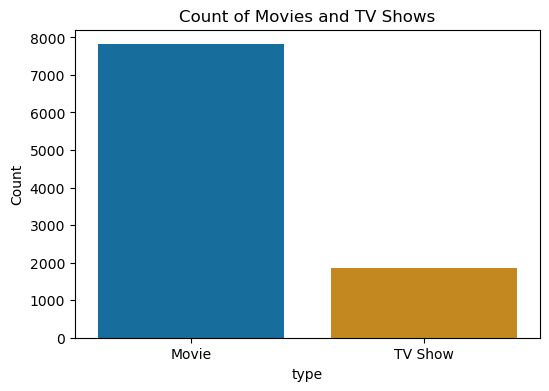

In [128]:
plt.figure(figsize=(6, 4))
sns.countplot(x='type', data=df, palette='colorblind')
plt.title('Count of Movies and TV Shows')
plt.ylabel('Count')
plt.show()


<b>FINDINGS:</b> <br>
Amazon Prime releases more movies than TV shows according to the data. Movies make up around 80.8% of the total data, while TV shows make up the remaining 19.2% of the data.

### 2. What are the most common ratings of movies and tv shows?

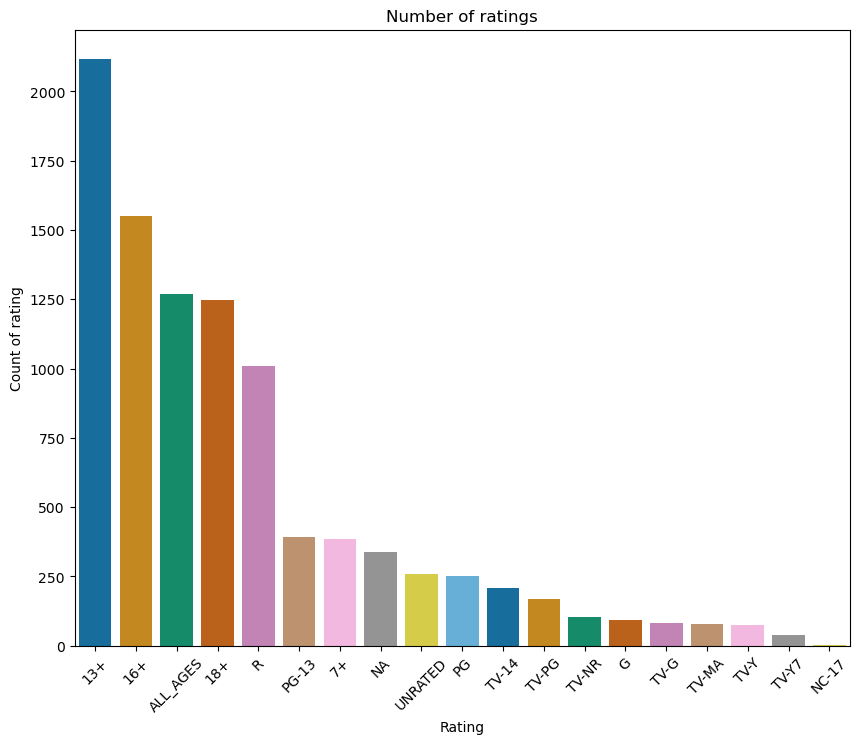

In [127]:
plt.figure(figsize=(10, 8))
sns.barplot(x=count_of_rating.index, y=count_of_rating.values, palette='colorblind')
plt.title('Number of ratings')
plt.xlabel('Rating')
plt.ylabel('Count of rating')
plt.xticks(rotation=45)
plt.show()

<b>FINDINGS:</b> <br>
The top 3 most popular ratings of movies and tv shows are: 13+, 16+ and all ages.

### 3. What years released the most and least amount of movies and shows?

In [142]:
top10_release_year = df['release_year'].value_counts().nlargest(10)

top10_release_year

release_year
2021    1442
2020     962
2019     929
2018     623
2017     562
2016     521
2014     391
2015     378
2013     289
2011     252
Name: count, dtype: int64

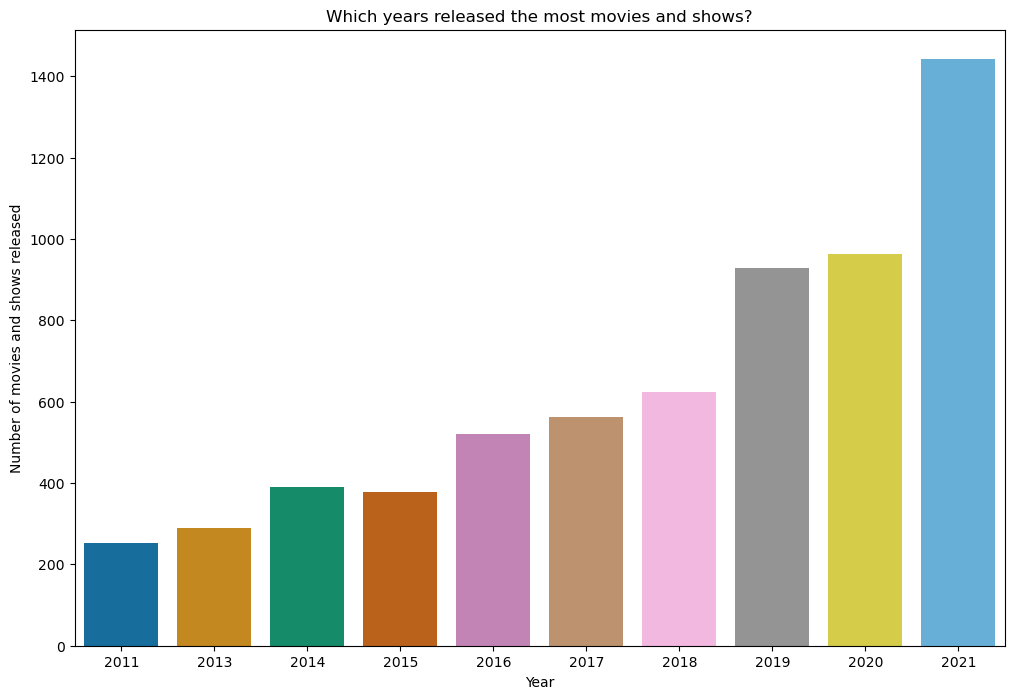

In [147]:
plt.figure(figsize=(12, 8))
sns.barplot(x=top10_release_year.index, y=top10_release_year.values, palette='colorblind')
plt.title('Which years released the most movies and shows?')
plt.xlabel('Year')
plt.ylabel('Number of movies and shows released');

In [146]:
bottom10_release_year = df['release_year'].value_counts().nsmallest(10)

bottom10_release_year

release_year
1924    1
1923    1
1927    1
1922    2
1926    2
1931    3
1920    3
1929    4
1933    5
1930    5
Name: count, dtype: int64

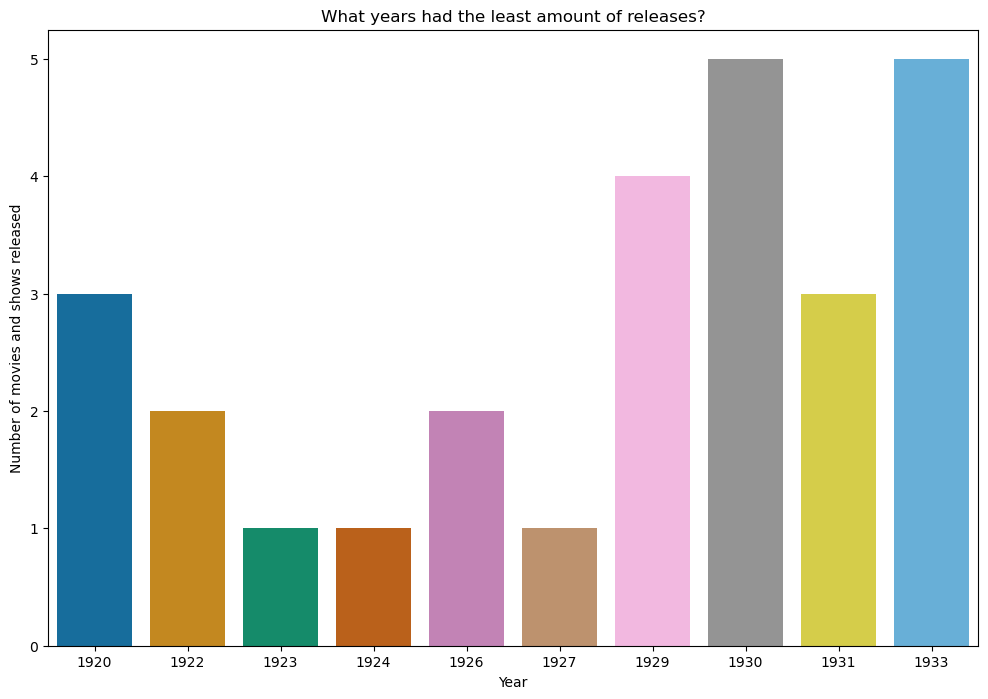

In [148]:
plt.figure(figsize=(12, 8))
sns.barplot(x=bottom10_release_year.index, y=bottom10_release_year.values, palette='colorblind')
plt.title('What years had the least amount of releases?')
plt.xlabel('Year')
plt.ylabel('Number of movies and shows released');

<b>FINDINGS:</b> <br>
2021 released a total of 1442 movies and tv shows.
While 1923, 1924, and 1927 had the least amount of releases. These 3 years only had 1 movie or tv show released.


# Conclusions about the data
1. Amazon Prime releases more movies than TV shows. Movies make up around 80.8% of the total data, while TV shows make up the remaining 19.2% of the data.
2. The top 3 most popular ratings of movies and tv shows are: 13+, 16+ and all ages.
3. 2021 released the most amount of movies and tv shows, with a total of 1442 movies and tv shows. And there are only 3 years that released with 1 movie or tv show: 1923, 1924, and 1927.


# Further analysis...
I would like to see data on the ratings of each movie or show by customers to find out the most popular movies or shows. With this data, I can recommend what types of genres would bring more customers to Amazon Prime. 